<img src="data/img/np_basics_2_logo.png" height=300px width=650px>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To revise what we have learnt till now, let's look at the following example

# Diffusion using random walks
The following example has been adapted from [scipylectures.org](https://scipy-lectures.org/intro/numpy/operations.html#basic-reductions).   

We will model the diffussion of a particle in a one dimensional gird using a random walk. The particle starts at the origin at $t=0$ and at each time step jumps right or left with equal probability. A step towards left is denoted by a displacement of `-1` units and a step towards right is `+1` units.

<img src="data/img/random_walk_1.png" height=100 width=450>

**We want to find the typical distance (in units of grid points) from the origin of a random walker after `t` left or right jumps**
To achieve this, we will generate a random trajectory for a walker. We will then generate a lot of such walks (lets call them *stories*) and check their statistical properties to find a pattern.    

The simulation will be done using NumPy array computing tricks: we are going to create a 2D array with the *stories* along one axis and time along another.

<img src="data/img/random_walk_schema_1.png" height=300px width=300px>

In [ ]:
n_stories = 10000 # number of stories i.e the maximum number of independent walks
t_max = 200      # time during which we follow the walker

We will create the array of steps taken by the walkers shown in the above schema using the function `np.random.choice()`. The first argument will be a list of values from which the numbers will be chosen i.e. `[-1,1]`. The second argument will be a tuple denoting the shape of the array to be created.

In [ ]:
steps = np.random.choice([-1,1], (n_stories, t_max))      # COMPLETE THIS LINE OF CODE

We find the *displacement* from the origin for each of the walker as a function of time by calculating the cumulative sum of the steps **along the time axis** using `np.cumsum()`.

<img src="data/img/random_walk_schema_2.png" height=300px width=300px>

In [ ]:
displacements = np.cumsum(steps, axis = 1)     # COMPLETE THIS LINE OF CODE

We now find the root mean squared displacement as a function of time by calculating the statistic along the axis of the *stories*. You can use the `np.sqrt()`, `np.mean` and `**` functions and operations.

In [ ]:
# COMPLETE THESE THREE LINES OF CODE
sq_displacement = displacements**2                      #squared displacement
mean_sq_disp = np.mean(sq_displacement, axis =0)                            #mean squared displacement along the story axis
rms_disp =  np.sqrt(mean_sq_disp)                                 # root mean squared displacement

Let's now plot our results. We generate an array containing the time steps and plot the RMS displacement versus the time steps. We also plot a $\sqrt{t}$ in the same plot.

In [ ]:
# generate the time axis
t = np.arange(200)             # COMPLETE THIS LINE OF CODE

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(t, rms_disp, label = "Simulation", marker="x", c="C0")
plt.plot(t, np.sqrt(t), label = r"$t$", c="C1", lw=2)
plt.legend()
plt.xlabel(r"$t$", fontsize=20) 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$", fontsize=20) 

We find a well-known result in physics: the RMS distance grows as the square root of the time!   

To get a feel of how efficiently we did all the above calculations on such a huge number of elements, let us time the code used to do all the calculations. Paste the all code to do the calculations (except plotting) in the cell below:

In [ ]:
%%timeit
# PASTE THE CODE HERE
n_stories = 10000 # number of stories i.e the maximum number of independent walks
t_max = 200
steps = np.random.choice([-1,1], (n_stories, t_max))  
displacements = np.cumsum(steps, axis = 1)     # COMPLETE THIS LINE OF CODE
# COMPLETE THESE THREE LINES OF CODE
sq_displacement = displacements**2                      #squared displacement
mean_sq_disp = np.mean(sq_displacement, axis =0)                            #mean squared displacement along the story axis
rms_disp =  np.sqrt(mean_sq_disp)                                 # root mean squared displacement

For comparison we will do a very simple calculation on the same number of elements using native Python. I hope this helps you to appreciate vectorized calculations!

In [ ]:
%%timeit

vals = [i for i in range(n_stories*t_max)]
new_vals = [i+1 for i in vals]

# Fancy Indexing

### Boolean arrays and logical operations

Just like `int` and `float` the elements of a NumPy array can also be boolean values i.e. `True` or `False`. These arrays may be created as a result of element wise comparison between two arrays.

In [2]:
a1 = np.array([1, 2, 3, 4])
b1 = np.array([4, 2, 2, 4])

In [3]:
a1 == b1

array([False,  True, False,  True])

In [11]:
a1 >= b1

3

**NOTE:** if we want to check whether two arrays are identical to each other, we can use the function `np.array_equal()`

Element wise logical operations can be done using built in functions

In [6]:
a2 = np.array([True, True, False, False])
b2 = np.array([True, True, False, False])

In [8]:
np.logical_or(a2, b2)

array([ True,  True, False, False])

In [9]:
a2 | b2

array([ True,  True, False, False])

**NOTE:** In addition to the predefined functions shown above the binary operators `&`, `|` and `~` can also be used to determine the element wise logical AND, OR and NOT.   
When performing `sum()` on boolean arrays, the `True` values are treated as 1 and `False` as zero.

In [10]:
a2.sum()

2

### Indexing with boolean arrays

If instead of using integers we index arrays with other boolean arrays of same (or compatible) shape, the returned array will be composed of elements of the original array for which the corresponding boolean index was True. For example

In [12]:
a1

array([1, 2, 3, 4])

In [13]:
a1[[True, False, False, True]]

array([1, 4])

We may have an array of data where negative values indicate some kind of error. We can use a boolean *mask* to select array elements which satisfy our criteria

In [14]:
x = np.array([1.2, 2.8, 3.5, -999, 2.7, 4.8, -999])

mask = (x > 0)
mask

array([ True,  True,  True, False,  True,  True, False])

In [15]:
x[mask]

array([1.2, 2.8, 3.5, 2.7, 4.8])

Generally it is done in a single step

In [16]:
x[x>0]

array([1.2, 2.8, 3.5, 2.7, 4.8])

We can also set specific values for array elements which satisfy our criteria

In [18]:
x[x<0] = np.nan
x

/home/biprateep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


array([1.2, 2.8, 3.5, nan, 2.7, 4.8, nan])

**NOTE:** `np.nan` is a special data object (of type `float`) which is used to denote invalid or missing values. NumPy is built to gracefully handle invalid or missing data points as long as they are marked with `NaN` (Not a Number). This is the recommended way of doing this instead of the more traditional way of denoting missing data with absurd numbers. For convenience, NumPy has a host of such special constants defined which are listed [here](https://numpy.org/doc/stable/reference/constants.html?highlight=constants).

### Masking lines in a spectra

An `.npy` file (`data/sdss_spectra.npy`) has been provided containing the spectra of a galaxy. The `0th` axis corresponds to the wavelength sampling. The `1th` axes has 3 elements. The `0th` element is the wavelength grid, the `1th` element is the measured (and normalized) flux and the `2th` element gives the flux errors. Lets first read in the data and unpack them into separate arrays.

In [21]:
#COMPLETE THESE THREE LINES OF CODE
data = np.load("data/sdss_spectra.npy") #read in the data
wavelength = data[:,0] #allocate the proper 1D slices
flux = data[:,1]
flux_err = data[:,2]

Lets plot the spectra

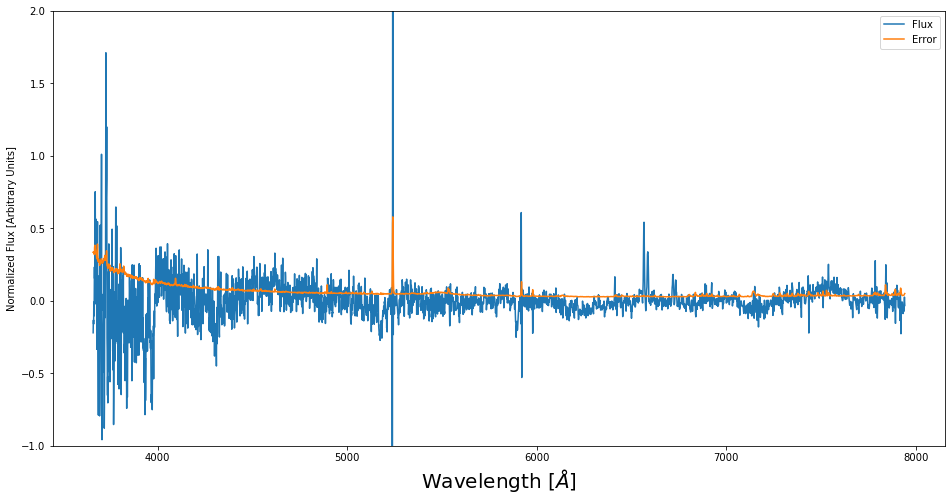

In [22]:
plt.figure(figsize=(16,8))
plt.plot(wavelength, flux, label="Flux")
plt.plot(wavelength, flux_err, label="Error")
plt.ylim(-1,2)
plt.xlabel("Wavelength [$\AA$]", fontsize=20)
plt.ylabel("Normalized Flux [Arbitrary Units]")
plt.legend()

Lets mask measurements having high errors. Lets reject all flux values for which the error is greater than 0.2. We will first create a boolean mask.

In [23]:
good_data_mask = (flux_err<0.2) #COMPLETE THIS LINE OF CODE

Now lets use this mask to index our arrays.

In [25]:
#COMPLETE THESE TWO LINES OF CODE
good_wavelength = wavelength[good_data_mask]
good_flux = flux[good_data_mask]

Lets plot the array we selected.

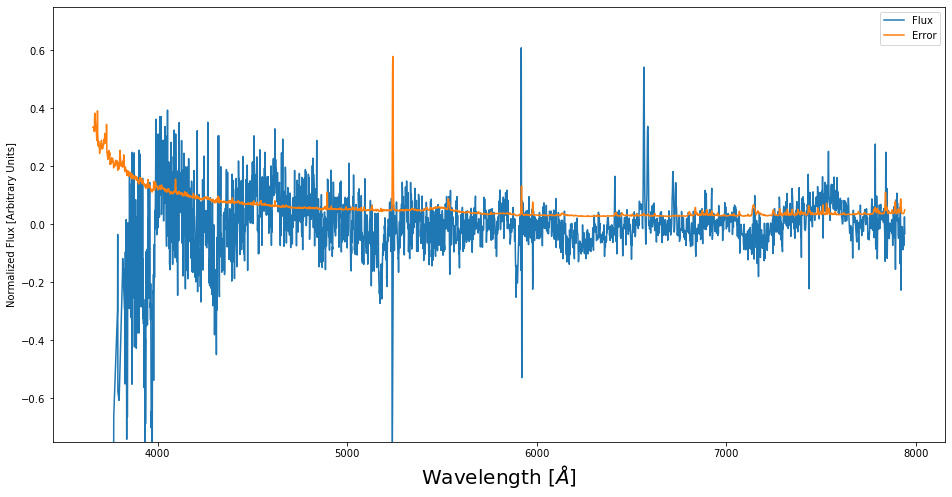

In [26]:
plt.figure(figsize=(16,8))
plt.plot(good_wavelength, good_flux, label="Flux")
plt.plot(wavelength, flux_err, label="Error")
plt.ylim(-0.75,0.75)
plt.xlabel("Wavelength [$\AA$]", fontsize=20)
plt.ylabel("Normalized Flux [Arbitrary Units]")
plt.legend()

We can see emission and absorption lines in the above spectra. Lets try to get rid of them by keeping flux values which are less than $2\sigma$ away from the mean. For this you need to use the numpy functions `np.mean()`, `np.std()` and the `|` boolean operator. (Alternatively the `np.abs()` function can also be used).

In [33]:
#COMPLETE THIS LINE OF CODE
cont_mask = np.abs(good_flux - np.mean(good_flux)) < (2*np.std(good_flux))

Lets see what we have selected using this mask

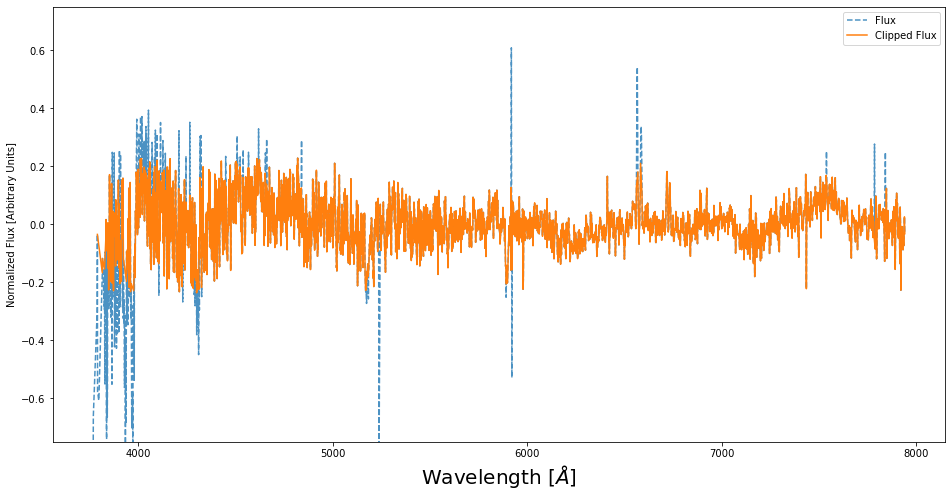

In [34]:
cont_wavelength = good_wavelength[cont_mask]
cont_flux = good_flux[cont_mask]

plt.figure(figsize=(16,8))
plt.plot(good_wavelength, good_flux, label="Flux", ls="--", alpha=0.8)
plt.plot(cont_wavelength, cont_flux, label="Clipped Flux")

plt.ylim(-0.75,0.75)
plt.xlabel("Wavelength [$\AA$]", fontsize=20)
plt.ylabel("Normalized Flux [Arbitrary Units]")
plt.legend()

### `np.where()`: Turning a mask into indices

In [4]:
x = np.arange(10).reshape((2, 5))
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

The `np.where` function returns the locations of the elements where the given condition is `True`

In [6]:
np.where(x < 3)

(array([0, 0, 0]), array([0, 1, 2]))

**NOTE:** Instead of returning just the locations of elements `np.where` can also return elements from one of two arrays based on the condition. You can find details [here](https://numpy.org/doc/stable/reference/generated/numpy.where.html?highlight=where#numpy.where)

### Indexing with other sequences

We can also index elements of arrays using other arrays whose elements denote the indices of the elements to be selected.

In [7]:
x = np.arange(16).reshape((4, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [8]:
x[range(4), range(4)]

array([ 0,  5, 10, 15])

The image below from [scipylectures.org](https://scipy-lectures.org/intro/numpy/array_object.html#fancy-indexing) summarizes fancy indexing.

<img src="data/img/np_fancy_indexing.png" height=300px width=650px>

### Classifying the pretty pictures

Another `.npy` file (`data/sdss_morpho.npy`) has been provided which contains morphological classification of the galaxies we dealt with in the previous notebook. The galaxy is *spheroidal* if the value of the corresponding element is `0` and *discy* if the value is `1`. First read the two data files (images and morphologies) into NumPy arrays.

In [ ]:
# COMPLETE THESE TWO LINES OF CODE
img = 
morpho =

How many of the given galaxies are spheroids?

In [ ]:
morpho[]                    #COMPLETE THIS LINE OF CODE

Using boolean indexing, select only the images of spheroidal galaxies

In [ ]:
spheroid_img =                  #COMPLETE THIS LINE OF CODE

Flag all the pixels which have negative values by replacing them with `np.nan`.

In [ ]:
spheroid_img[] =               #COMPLETE THIS LINE OF CODE

Now plot the $r$ wavelength band of all these spheroids in a similar way to the last notebook.

In [ ]:
# COMPLETE THESE TWO LINES OF CODE
for i in range(): #loop over the number of spheroids
    plt.imshow(np.tanh(spheroid[]) , cmap="gray") #select the correct galaxy and wavelength band

# Array shape manipulation

NumPy lets us rearrange the elements in an array and reshape them into other forms.   
### Flattening
We can unpack the elements of a multidimensional array into a 1D array using the `array.ravel()` method.

In [9]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a.shape)
print(a.ravel())

(2, 3)
[1 2 3 4 5 6]


Create the transpose of the above array and flatten it to see how the method works on arrays of different shapes.

In [11]:
a_transpose =  a.T               # COMPLETE THIS LINE OF CODE
print(a_transpose)

[[1 4]
 [2 5]
 [3 6]]


In [12]:
a_transpose.ravel()

array([1, 4, 2, 5, 3, 6])

### Dimension adding

Indexing with the np.newaxis object allows us to add an axis to an array

In [ ]:
z = np.array([1, 2, 3])
print(z)
print(z.shape)

In [ ]:
z[:, np.newaxis]

### Reshaping

The shape of an array can be modified, as long as the total number of elements is unchanged. Here we use reshape put the flattened array back to its original shape.

In [13]:
b = a.ravel()
b = b.reshape((2, 3))
b


array([[1, 2, 3],
       [4, 5, 6]])

Create a 2$\times$4 matrix with elements starting from 0 and increasing by 1 using `array.reshape()`

In [14]:
np.arange(8).reshape((2,4))                   # COMPLETE THIS LINE OF CODE

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

**NOTE:** The reshape operation (also slicing and many other NumPy operations) creates a *view* of the original array. This is just an efficient way of accessing array data.      
**When modifying the view, the original array is modified as well:**

In [19]:
arr = np.arange(8) # Create an array
arr2 = arr.reshape(2, 4).copy() #Reshape the array (this creates a view)

arr[0] = 1000 # change an element of the first array

In [20]:
arr

array([1000,    1,    2,    3,    4,    5,    6,    7])

In [21]:
arr2

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

# Broadcasting

As we have seen basic operations on NumPy arrays (addition, etc.) are elementwise. Operations between two arrays work when the arrays are of same size. **However** It is also possible to do operations (i.e. `+`, `-`, `*`, `/`) between arrays of different sizes if NumPy can transform these arrays so that they all have the same size, this conversion is called *broadcasting*. The process can be illustrated using this image from [scipy-lectures.org](https://scipy-lectures.org/intro/numpy/operations.html#broadcasting).

<img src="data/img/np_broadcasting.png" height=300px width=800px>

We can check the above by seeing that this works

In [22]:
arr1 = np.ones((2, 3))
arr2 = np.ones((2, 1))

arr1 + arr2

array([[2., 2., 2.],
       [2., 2., 2.]])

While this does not

In [25]:
arr1 = np.ones((2, 3))
arr2 = np.ones(2)

arr1 + arr2

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

Now try this:   

`A = [[1 2 3 4]
     [5 6 7 8]]`
   
Use `np.arange` and `np.reshape` to create the array `A`.   

The array is defined as `B = [1 2]`   

Use broadcasting to add B to each column of A to create the final array

`A + B = [[2  3  4  5]
         [7  8  9 10]`


In [28]:
A = np.arange(8).reshape(2,4)           # COMPLETE THIS LINE OF CODE
B = np.array([1,2])

In [33]:
A + B.reshape(2,1)             # COMPLETE THIS LINE OF CODE

array([[1, 2, 3, 4],
       [6, 7, 8, 9]])

### Scaling a dataset   
As a first step of many kinds of data analysis, we scale the data my subtracting the mean and dividing by the standard deviation. We will perform such an operation efficiently with the help of Broadcasting. First lets create our simulated dataset.

In [35]:
X = np.random.normal([5,10,15],[2,3,4], (10000, 3))

In [36]:
X.shape

(10000, 3)

Our simulated data set `X` has measurements of 3 properties for 10000 different objects. Their respective distributions (Gaussians with different means and variances) are plotted below. The aim is to scale the data set so that it has zero mean and unit standard deviation.

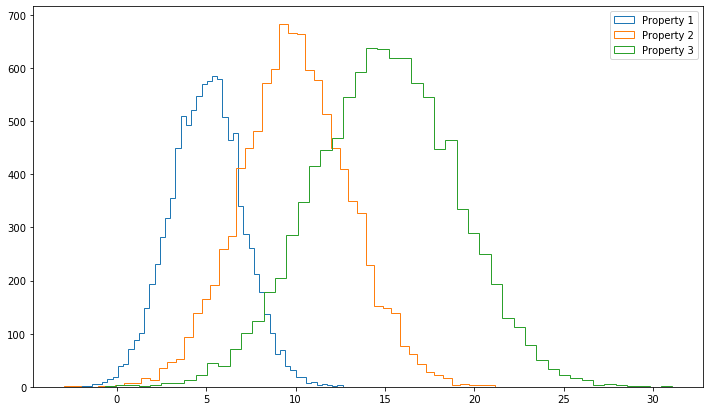

In [37]:
plt.figure(figsize=(12,7))
plt.hist(X[:,0], bins=50, histtype="step", label="Property 1")
plt.hist(X[:,1], bins=50, histtype="step", label="Property 2")
plt.hist(X[:,2], bins=50, histtype="step", label="Property 3")
plt.legend()

Find the mean (`np.mean()`) and the standard deviation (`np.std()`) for each of the property

In [40]:
X_mean = np.mean(X, axis=0)              #COMPLETE THESE TWO LINES OF CODE
X_std = np.std(X, axis=0)

Computed the scaled dataset by subtracting the mean and dividing by the standard deviation corresponding to each property 

In [42]:
X_scaled = (X-X_mean)/X_std     #COMPLETE THIS LINE OF CODE

We can verify the operation by seeing the distributions.

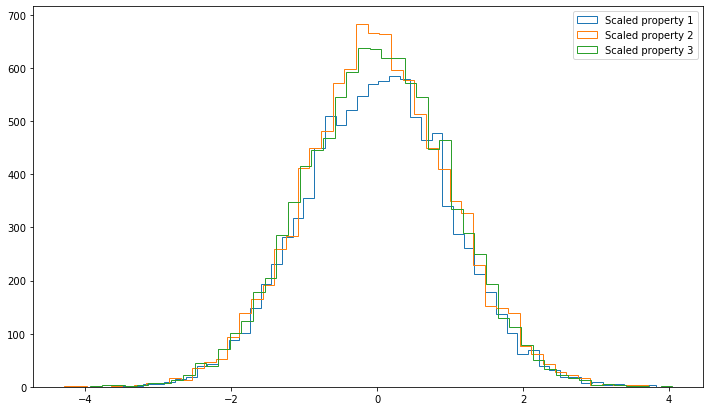

In [44]:
plt.figure(figsize=(12,7))
plt.hist(X_scaled[:,0], bins=50, histtype="step", label="Scaled property 1")
plt.hist(X_scaled[:,1], bins=50, histtype="step", label="Scaled property 2")
plt.hist(X_scaled[:,2], bins=50, histtype="step", label="Scaled property 3")
plt.legend()

# Summary
I hope by now you appreciate how efficiently (both in terms of run time and number of lines of code written) we can perform operations on multi-dimensional arrays using NumPy.   
**If there are three main lessons to be learnt from this tutorial, they should be:**
- vectorize (eliminate loops!)
- vectorize (eliminate loops!)
- vectorize (eliminate loops!)

# Acknowledments
This tutorial is heavily derived from the following sources. It is recommended to check them out for a comprehensive coverage of topics.
- [scipy-lectures](https://scipy-lectures.org/)
- [The Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [2016 Python Bootcamp for UW Astronomy and Physics](https://github.com/bmorris3/2014_fall_ASTR599)
- [Numpy Documentation](https://numpy.org/doc/stable/)